In [1]:
import scrublet as scr
import pandas as pd
import anndata 

In [2]:
adata= anndata.read_h5ad('BT333_T.h5ad')





In [3]:
scrub = scr.Scrublet(adata.X)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.52
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 135.0 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

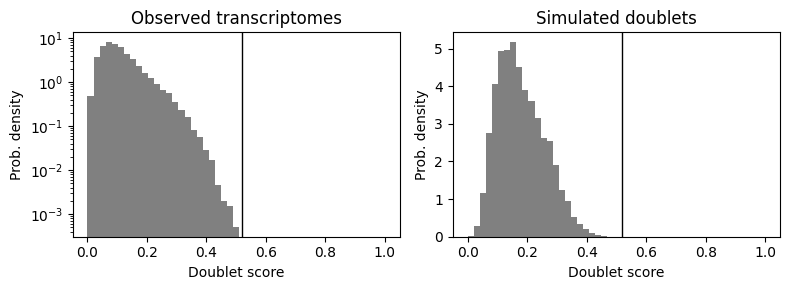

In [4]:
scrub.plot_histogram() # plot doublet score histograms 


In [5]:
doublet_scores

array([0.2454435 , 0.06992288, 0.10057288, ..., 0.09475621, 0.05076586,
       0.13780919])

In [11]:
adata.obs["doublet_score"]=doublet_scores
adata.obs["is_doublet"]=predicted_doublets
adata.obs['is_doublet']=adata.obs['is_doublet'].astype(str)

In [7]:
# Get counts without using .sum() which might cause issues
true_count = (adata.obs['is_doublet'] == "True").sum()
false_count = (adata.obs['is_doublet'] == "False").sum()

# Total count
total = true_count + false_count

# Calculate percentages
true_percent = (true_count / total) * 100 if total > 0 else 0
false_percent = (false_count / total) * 100 if total > 0 else 0

print(f"True values (doublets): {true_count} ({true_percent:.2f}%)")
print(f"False values (singlets): {false_count} ({false_percent:.2f}%)")

True values (doublets): 0 (0.00%)
False values (singlets): 98855 (100.00%)


In [8]:
#### The birthday problem is showing approaximating 0.3 percent as well, perfect

In [12]:
# Create a copy of the column with a different name if you need to preserve the data
adata.var.rename(columns={'_index':'index'},inplace=True)
adata.raw.var.rename(columns={'_index':'index'},inplace=True) 
    
# Now try writing again
adata.write('BT333_T_doublet.h5ad')

In [13]:
subset_df = adata.obs[['cell_ID', 'is_doublet']]
subset_df.to_csv('doublet_info.csv')

In [ ]:
##### There is no doublets!